In [1]:
import h5py, random
import math
import argparse
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

In [4]:
file =glob.glob('/pscratch/sd/b/bbbam/IMG_aToTauTau_m1p2T018_combined_normalized_h5/*valid*')
file_ = file[0]
data = h5py.File(f'{file_}', 'r')
num_images = len(data["all_jet"])
num_images_select = num_images

print("Total number----", num_images)

batch_size =5000
am = []
apt = []
taudR = []
im_indices = list(range(num_images))
# print(im_indices)

random.shuffle(im_indices)
# print(random.shuffle(im_indices))

for start_idx in tqdm(range(0, num_images_select, batch_size)):
    end_idx = min(start_idx + batch_size, num_images)
    sorted_indices = sorted(im_indices[start_idx:end_idx])
    # print(sorted_indices)
    # images_batch = data["all_jet"][start_idx:end_idx, :, :, :]
    am_batch = data["am"][sorted_indices, :]
    # ieta_batch = data["ieta"][sorted_indices, :]
    # iphi_batch = data["iphi"][sorted_indices, :]
    # m0_batch = data["m0"][sorted_indices, :]
    apt_batch = data["apt"][sorted_indices, :]
    # jetpt_batch = data["jetpt"][sorted_indices, :]
    taudR_batch = data["taudR"][sorted_indices, :]
    am.append(am_batch)
    apt.append(apt_batch)
    taudR.append(taudR_batch)
am = np.concatenate(am)
apt = np.concatenate(apt)
taudR = np.concatenate(taudR)
print("Done")

Total number---- 448604


100%|██████████| 90/90 [04:05<00:00,  2.73s/it]


NameError: name 'mass' is not defined

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

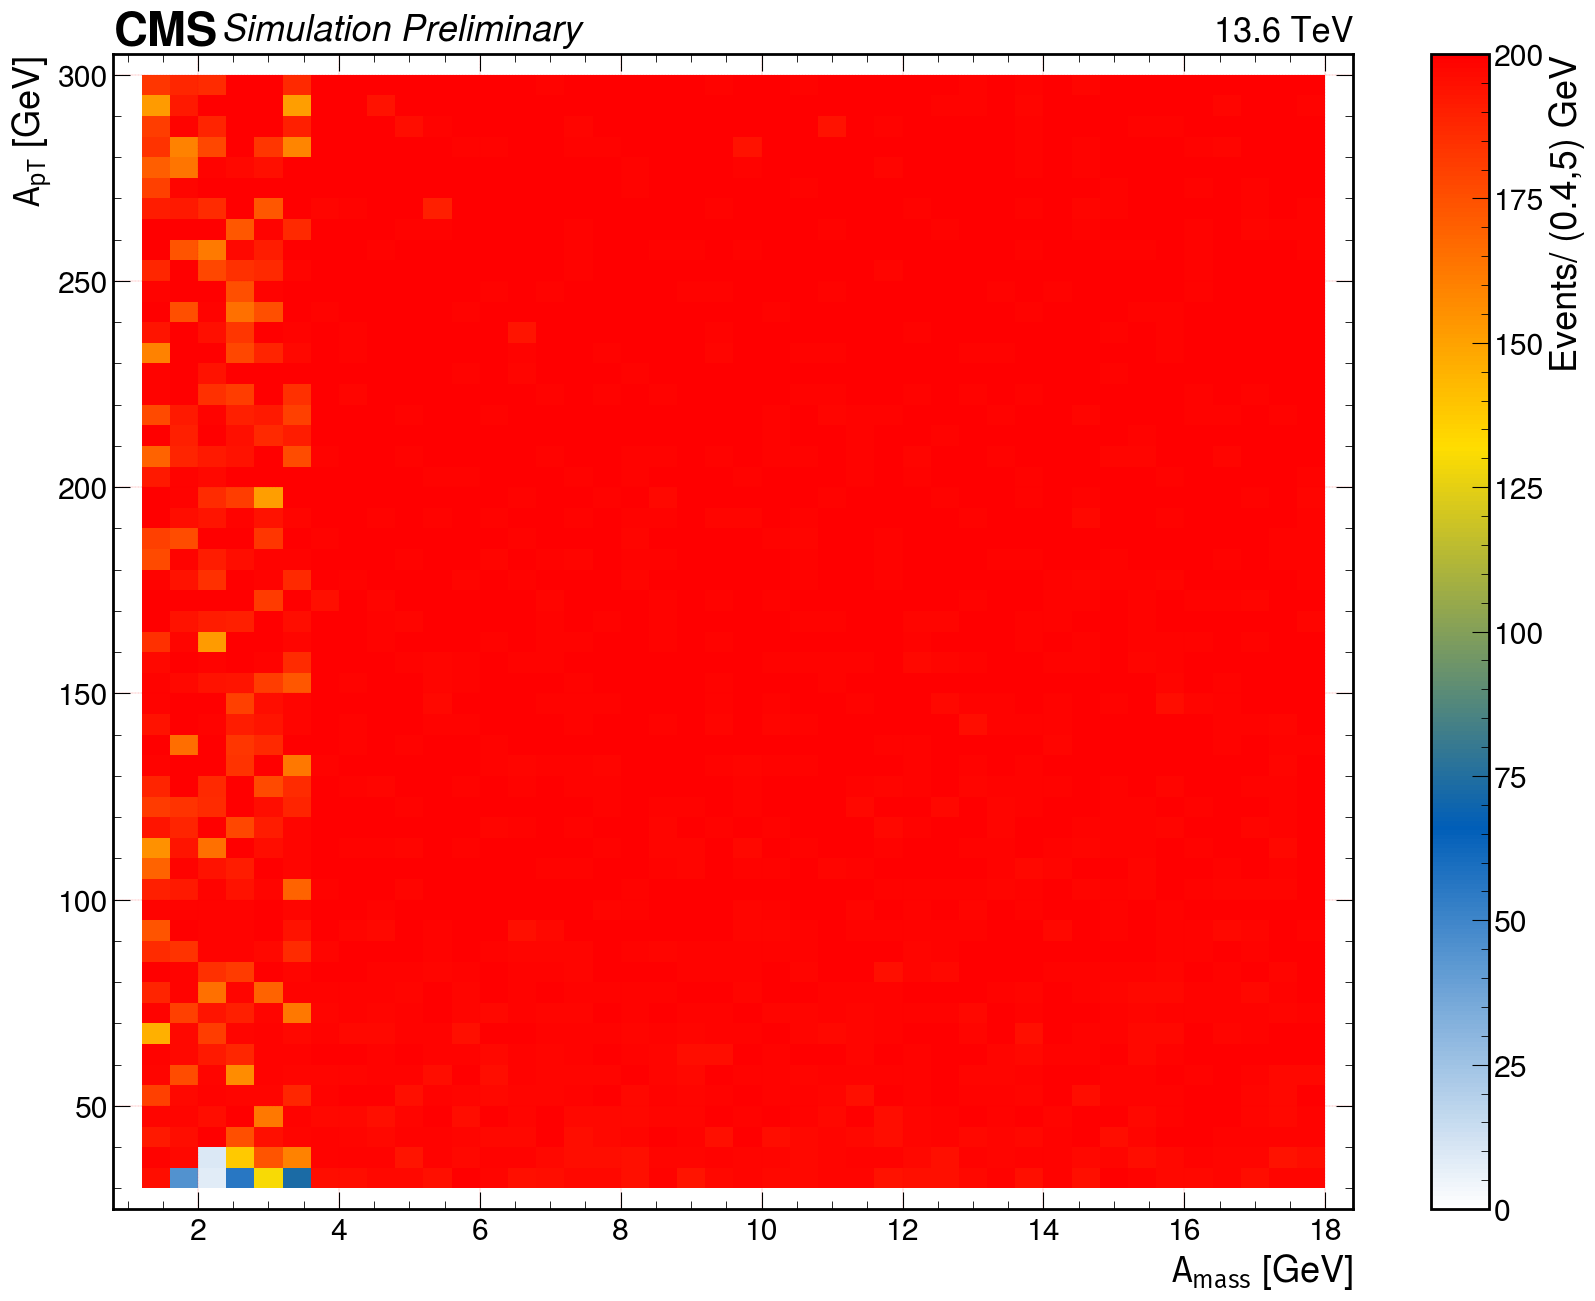

In [5]:
mass_bins = np.arange(0.8,18.5,.4)
pt_bins = np.arange(25,306,5)
fig, ax = plt.subplots(figsize=(20,15))
# norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 7000, vcenter=5500)
plt.hist2d(np.squeeze(am), np.squeeze(apt), bins=[mass_bins, pt_bins],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.colorbar().set_label(label='Events/ (0.4,5) GeV')
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

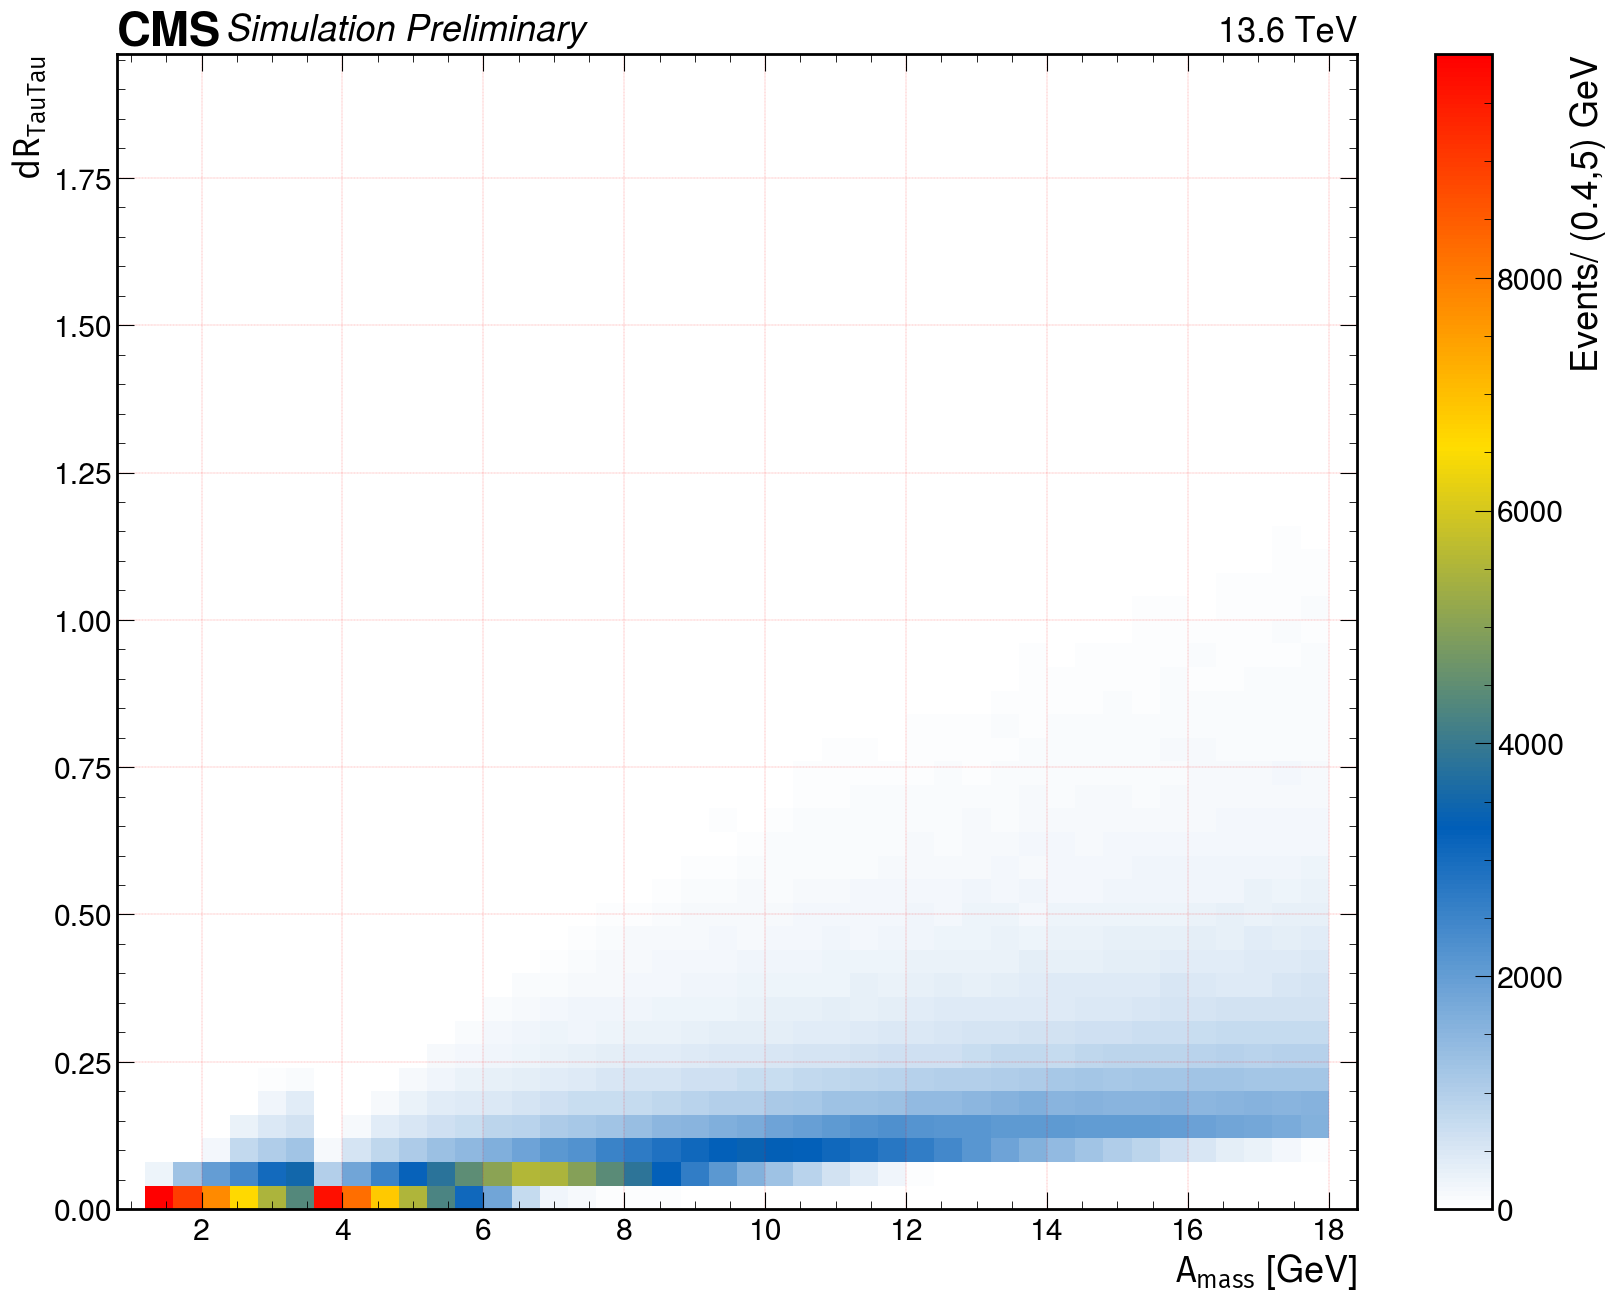

In [6]:

dR_bins = np.arange(0,2,0.04)
fig, ax = plt.subplots(figsize=(20,15))
# norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 7000, vcenter=5500)
plt.hist2d(np.squeeze(am), np.squeeze(taudR), bins=[mass_bins, dR_bins],cmap=cms_cmap)
plt.ylabel(r'$\mathrm{dR_{TauTau}}$')
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.colorbar().set_label(label='Events/ (0.4,5) GeV')
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

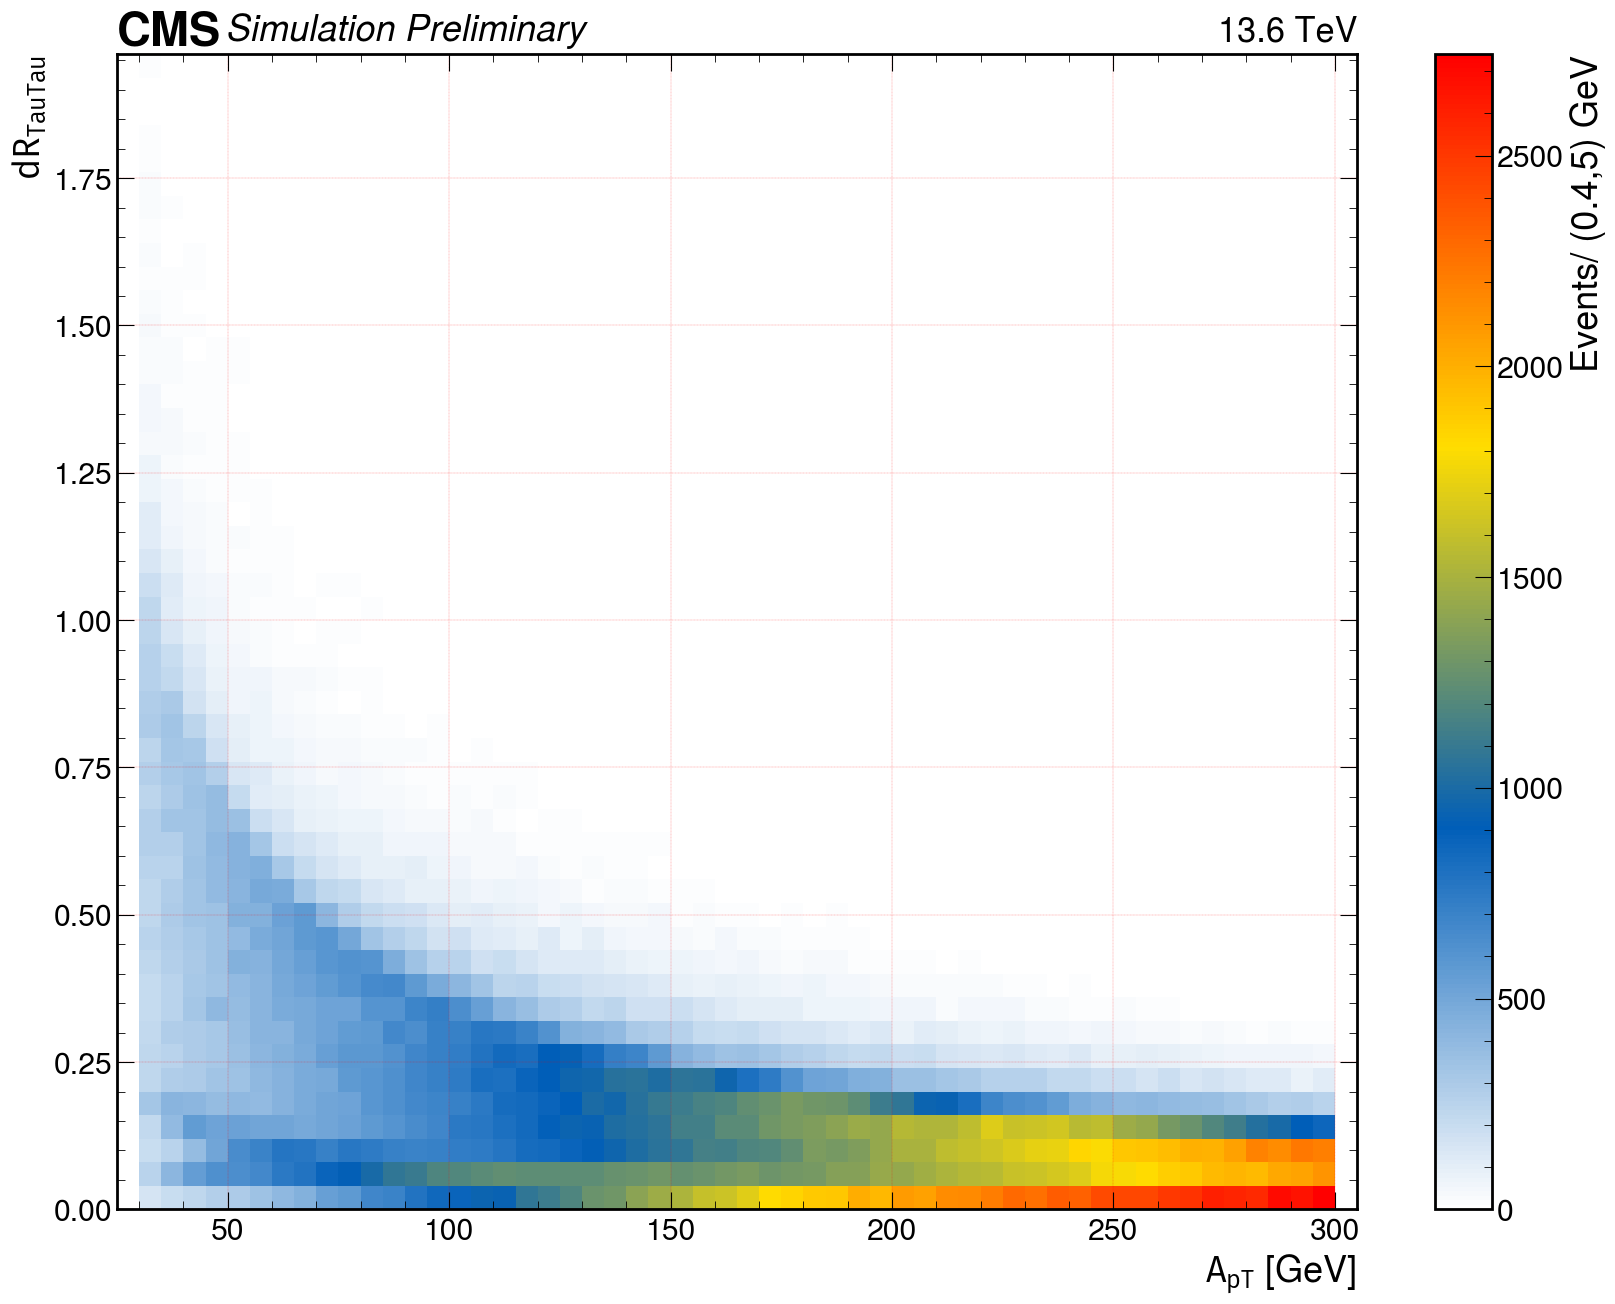

In [7]:

fig, ax = plt.subplots(figsize=(20,15))
# norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 7000, vcenter=5500)
plt.hist2d(np.squeeze(apt), np.squeeze(taudR), bins=[pt_bins, dR_bins],cmap=cms_cmap)
plt.ylabel(r'$\mathrm{dR_{TauTau}}$')
plt.xlabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.colorbar().set_label(label='Events/ (0.4,5) GeV')
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

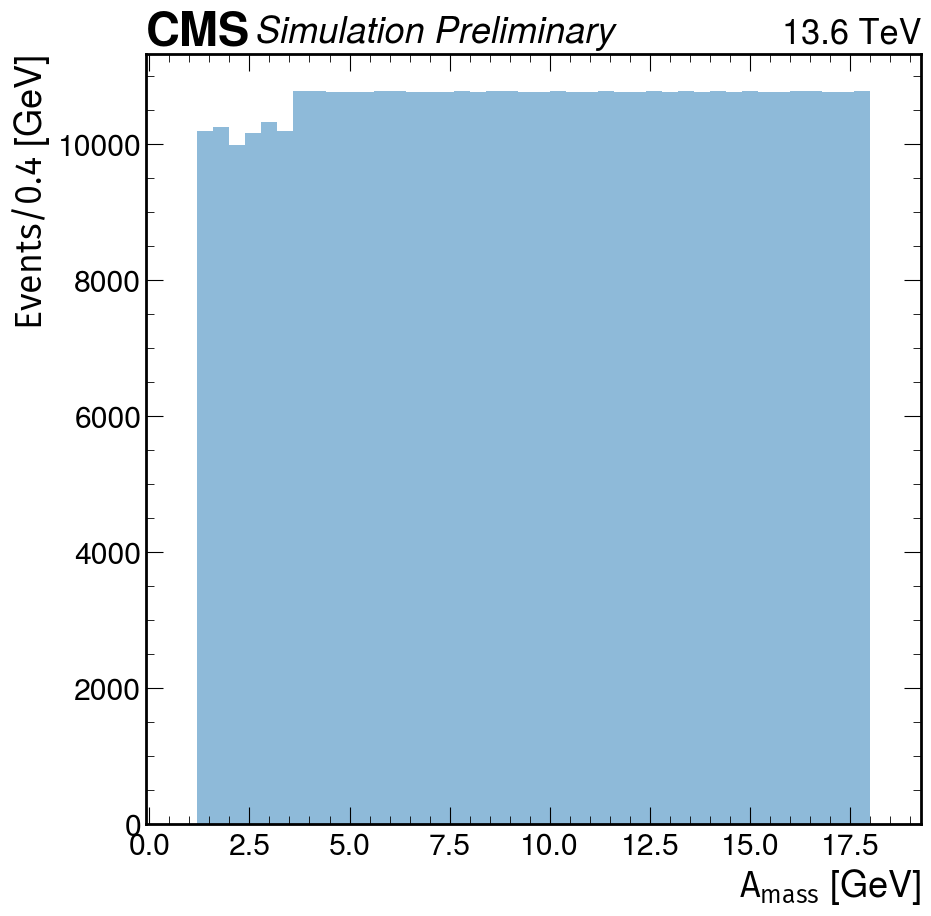

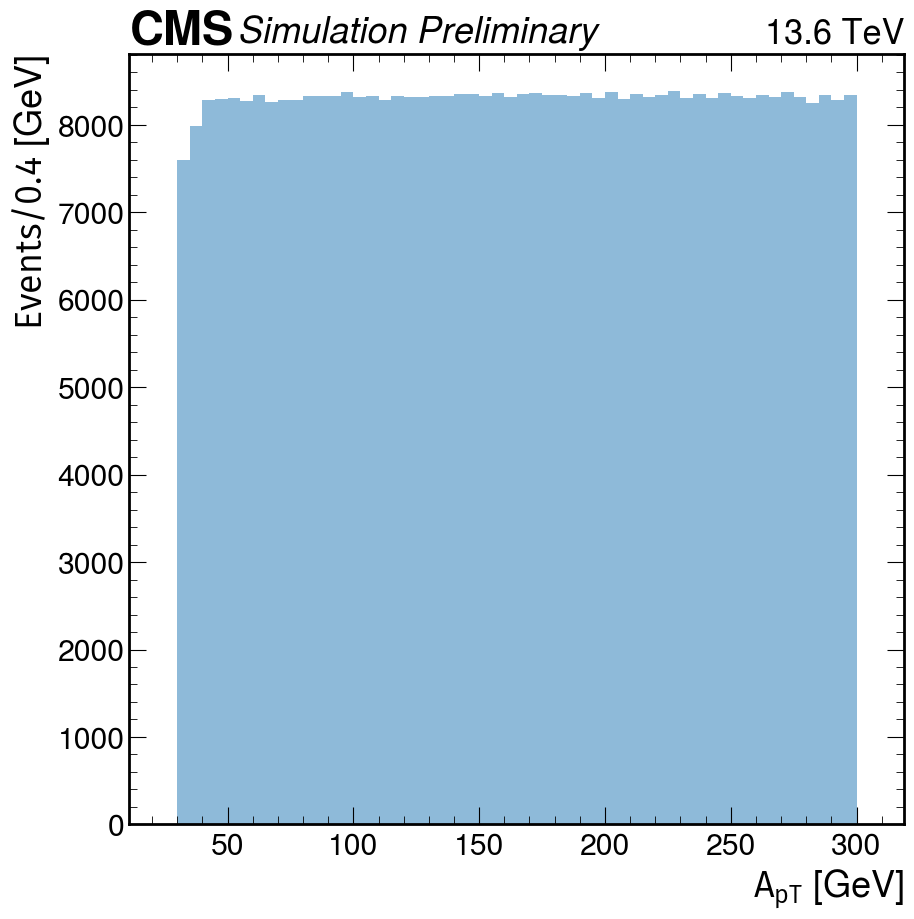

In [8]:
fig, ax = plt.subplots()
plt.hist(np.squeeze(am), bins=mass_bins, alpha=0.5)
plt.ylabel(r'$\mathrm{Events/0.4}$ [GeV]')
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

fig, ax = plt.subplots()
plt.hist(np.squeeze(apt), bins=pt_bins, alpha=0.5)
plt.ylabel(r'$\mathrm{Events/0.4}$ [GeV]')
plt.xlabel(r'$\mathrm{A_{pT}}$ [GeV]')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

In [26]:

# CHUNK_SIZE = 32
# batch_size = 320
# # Helper function to chunk the indices
# def chunk_indices(indices, chunk_size):
#     for i in range(0, len(indices), chunk_size):
#         yield indices[i:i + chunk_size]
        
# file =glob.glob('/pscratch/sd/b/bbbam/test/*train*')
# file_ = file[0]
# data = h5py.File(f'{file_}', 'r')
# num_images = len(data["all_jet"])
# num_images = 2000
# print("Total number----", num_images)
# im_indices = list(range(num_images))
# # random.shuffle(im_indices)
# print("im_indices", im_indices)
# chunked_train_indices = list(chunk_indices(im_indices, CHUNK_SIZE))
# random.shuffle(chunked_train_indices)
# im_indices = [index for chunk in chunked_train_indices for index in chunk]
# print("train_indices" , train_indices)
# mass = []
# for start_idx in tqdm(range(0, num_images, batch_size)):
#     end_idx = min(start_idx + batch_size, num_images)
#     sorted_indices = sorted(im_indices[start_idx:end_idx])
#     am_batch = data["am"][sorted_indices, :]
#     mass.append(am_batch)
# mass = np.concatenate(mass)
# print("mean ----", np.mean(mass), "std  ------", np.std(mass))

In [33]:

        
file =glob.glob('/pscratch/sd/b/bbbam/test/*')
file_ = file[0]
data = h5py.File(f'{file_}', 'r')
num_images_ = len(data["all_jet"])
num_images = 2000
print("Total number----", num_images_)

mass = []
for start_idx in tqdm(range(0, num_images, batch_size)):
    end_idx = min(start_idx + batch_size, num_images)
    am_batch = data["am"][start_idx:end_idx, :]
    mass.append(am_batch)
mass = np.concatenate(mass)
print("mean ----", np.mean(mass), "std  ------", np.std(mass))

Total number---- 4075777


100%|██████████| 7/7 [00:00<00:00, 3867.75it/s]

mean ---- 9.808195 std  ------ 4.9285564


(array([43., 37., 44., 47., 67., 41., 41., 50., 59., 44., 40., 56., 41.,
        42., 72., 43., 63., 44., 42., 37., 42., 60., 58., 47., 45., 37.,
        47., 47., 53., 50., 55., 47., 46., 44., 43., 51., 52., 43., 38.,
        53., 40., 49.]),
 array([1.2001245 , 1.25722921, 1.31433392, 1.3714385 , 1.42854321,
        1.48564792, 1.54275262, 1.59985733, 1.65696192, 1.71406662,
        1.77117133, 1.82827604, 1.88538074, 1.94248545, 1.99959004,
        2.05669475, 2.11379933, 2.17090416, 2.22800875, 2.28511357,
        2.34221816, 2.39932299, 2.45642757, 2.51353216, 2.57063699,
        2.62774158, 2.6848464 , 2.74195099, 2.79905558, 2.8561604 ,
        2.91326499, 2.97036982, 3.0274744 , 3.08457899, 3.14168382,
        3.1987884 , 3.25589323, 3.31299782, 3.37010241, 3.42720723,
        3.48431182, 3.54141665, 3.59852123]),
 [<matplotlib.patches.Polygon at 0x7f65c6fb50d0>])

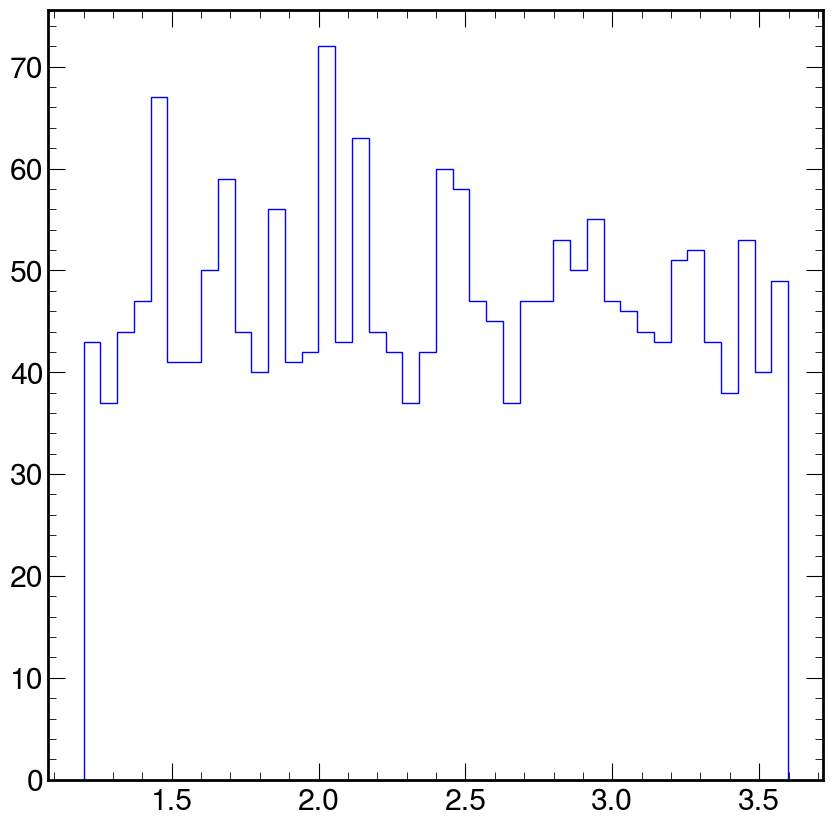

In [31]:
plt.hist(mass,bins=len(np.arange(1.2,18,0.4)),  histtype='step', color='b')